In [ ]:
import pandas as pd

# Читаем и предобрабатываем таблицу фич и коды регионов для работы с bezformata

In [ ]:
df_big = pd.read_csv('feat&name&oktmo&origfeat.csv')
df_map = pd.read_csv('bezformata-oktmo.csv', sep=';', usecols=['Name', 'oktmo'])
df_map = df_map.dropna()
df_big

,consnewareas,popsize,foodservturnover,roadslen,socialaid,invest,factoriescap,cultureorg,livarea,sportsvenue,...,saldo_sign,oktmo,name,popsize_orig,avgsalary_orig,invest_orig,retailturnover_orig,hospitals_orig,factoriescap_orig,consnewareas_orig
0,0.000661,0.006071,0.000000,0.087321,0.000000,0.000383,0.000170,0.000000,0.013828,0.290376,...,negative,1512000,Залесовский муниципальный округ,12979.0,32600.0,8.841821,51.596024,0.001233,18.850821,0.076585
1,0.000484,0.007617,0.001310,0.072149,0.020704,0.000982,0.000662,0.026696,0.014119,0.361289,...,negative,1601000,Алейский муниципальный район,12851.0,32525.1,27.927632,NaN,0.002334,86.323033,0.069100
2,0.004630,0.015168,0.001915,0.065813,0.010995,0.001528,0.000489,0.014177,0.011596,0.223424,...,positive,1602000,Алтайский муниципальный район,26210.0,32967.0,40.102633,63.026478,0.000572,59.167215,0.610568
3,0.000257,0.003959,0.000789,0.129991,0.036181,0.000124,0.000235,0.046653,0.015672,0.408182,...,negative,1603000,Баевский муниципальный район,8301.0,34458.6,3.118058,26.870907,0.001084,27.994073,0.032526
4,0.003296,0.018528,0.002022,0.102600,0.009097,0.000757,0.001141,0.011729,0.012227,0.235848,...,negative,1604000,Бийский муниципальный район,29580.0,35106.9,21.274442,31.371251,0.000879,146.141288,0.465416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.000074,0.008543,0.000408,0.074301,0.018682,0.008237,0.000421,0.048178,0.012955,0.373549,...,negative,99610000,Ленинский муниципальный район,17533.0,44574.6,190.238750,NaN,0.001312,44.984589,0.008555
2002,0.000103,0.013495,0.015516,0.048879,0.012270,0.004983,0.012103,0.126567,0.011742,0.359112,...,negative,99620000,Облученский муниципальный район,24122.0,70041.4,127.348188,28.840150,0.000788,1397.317507,NaN
2003,0.000116,0.003724,0.000397,0.095727,0.038007,0.000706,0.000290,0.196029,0.013003,0.265712,...,negative,99625000,Октябрьский муниципальный район,9207.0,42984.9,15.266971,NaN,0.001412,29.359965,0.012599
2004,0.002780,0.012626,0.001659,0.060042,0.013056,0.006365,0.002014,0.117839,0.013828,0.244087,...,negative,99630000,Смидовичский муниципальный район,23268.0,65733.0,158.506060,NaN,0.000516,227.566920,0.347774


In [ ]:
df_map['oktmo'] = df_map['oktmo'].astype(str).str.zfill(2)

df_map

,Name,oktmo
0,belgorod,14
1,bryansk,15
2,vladimir,17
3,voronej,20
4,moskva,45
...,...,...
84,magas,26
85,cherkesk,91
86,vladikavkaz,90
87,stavropol,07


In [ ]:
# столбец поддомена, который будем заполнять
df_big['subdomain'] = pd.NA
df_big['oktmo'] = df_big['oktmo'].astype(str).str.zfill(8)

# подрегионы: 3-значные коды
df_map3 = df_map[df_map['oktmo'].str.len() == 3].copy()

for _, row in df_map3.iterrows():
    pref3 = row['oktmo']
    name3 = row['Name']
    mask = df_big['oktmo'].str.startswith(pref3)
    df_big.loc[mask, 'subdomain'] = name3

In [ ]:
# обычные регионы: 2-значные коды
df_map2 = df_map[df_map['oktmo'].str.len() == 2].copy()

# первые две цифры ОКТМО = код субъекта
df_big['subj2'] = df_big['oktmo'].str[:2]

# словарь субъект - поддомен
subj2_to_name = dict(zip(df_map2['oktmo'], df_map2['Name']))

mask_empty = df_big['subdomain'].isna()
df_big.loc[mask_empty, 'subdomain'] = df_big.loc[mask_empty, 'subj2'].map(subj2_to_name)

In [ ]:
df_big

,consnewareas,popsize,foodservturnover,roadslen,socialaid,invest,factoriescap,cultureorg,livarea,sportsvenue,...,name,popsize_orig,avgsalary_orig,invest_orig,retailturnover_orig,hospitals_orig,factoriescap_orig,consnewareas_orig,subdomain,subj2
0,0.000661,0.006071,0.000000,0.087321,0.000000,0.000383,0.000170,0.000000,0.013828,0.290376,...,Залесовский муниципальный округ,12979.0,32600.0,8.841821,51.596024,0.001233,18.850821,0.076585,barnaul,01
1,0.000484,0.007617,0.001310,0.072149,0.020704,0.000982,0.000662,0.026696,0.014119,0.361289,...,Алейский муниципальный район,12851.0,32525.1,27.927632,NaN,0.002334,86.323033,0.069100,barnaul,01
2,0.004630,0.015168,0.001915,0.065813,0.010995,0.001528,0.000489,0.014177,0.011596,0.223424,...,Алтайский муниципальный район,26210.0,32967.0,40.102633,63.026478,0.000572,59.167215,0.610568,barnaul,01
3,0.000257,0.003959,0.000789,0.129991,0.036181,0.000124,0.000235,0.046653,0.015672,0.408182,...,Баевский муниципальный район,8301.0,34458.6,3.118058,26.870907,0.001084,27.994073,0.032526,barnaul,01
4,0.003296,0.018528,0.002022,0.102600,0.009097,0.000757,0.001141,0.011729,0.012227,0.235848,...,Бийский муниципальный район,29580.0,35106.9,21.274442,31.371251,0.000879,146.141288,0.465416,barnaul,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.000074,0.008543,0.000408,0.074301,0.018682,0.008237,0.000421,0.048178,0.012955,0.373549,...,Ленинский муниципальный район,17533.0,44574.6,190.238750,NaN,0.001312,44.984589,0.008555,birobidjan,99
2002,0.000103,0.013495,0.015516,0.048879,0.012270,0.004983,0.012103,0.126567,0.011742,0.359112,...,Облученский муниципальный район,24122.0,70041.4,127.348188,28.840150,0.000788,1397.317507,NaN,birobidjan,99
2003,0.000116,0.003724,0.000397,0.095727,0.038007,0.000706,0.000290,0.196029,0.013003,0.265712,...,Октябрьский муниципальный район,9207.0,42984.9,15.266971,NaN,0.001412,29.359965,0.012599,birobidjan,99
2004,0.002780,0.012626,0.001659,0.060042,0.013056,0.006365,0.002014,0.117839,0.013828,0.244087,...,Смидовичский муниципальный район,23268.0,65733.0,158.506060,NaN,0.000516,227.566920,0.347774,birobidjan,99


In [ ]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   consnewareas         2006 non-null   float64
 1   popsize              2006 non-null   float64
 2   foodservturnover     2006 non-null   float64
 3   roadslen             2006 non-null   float64
 4   socialaid            2006 non-null   float64
 5   invest               2006 non-null   float64
 6   factoriescap         2006 non-null   float64
 7   cultureorg           2006 non-null   float64
 8   livarea              2006 non-null   float64
 9   sportsvenue          2006 non-null   float64
 10  beforeschool         2006 non-null   float64
 11  goodcompincome       2006 non-null   float64
 12  hospitals            2006 non-null   float64
 13  retailturnover       2006 non-null   float64
 14  harvest              2006 non-null   float64
 15  agrprod              2006 non-null   f

# Topic Modeling

## Подготовка

In [ ]:
df_news = pd.read_csv('allNewsUnfiltered1Month.csv')

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
to_delete = ['Центр', 'Приволжье', 'Сибирь', 'Урал', 'Юг', 'Северо-Запад', 'Дальний Восток', 'Северный Кавказ']

In [ ]:
def delete_errors(data:pd.DataFrame, del_list:list):
  pattern = '|'.join(del_list)
  pattern2 = f'^({pattern})$'
  m = data['news'].str.fullmatch(pattern2, case=False, na=False)
  data = data[~m]
  return data

In [ ]:

df_news = delete_errors(df_news, to_delete)
df_news

,region,date,news
8,belgorod,2022-01-01,Белгородцы пробежали 2022 метра в новогоднем з...
9,belgorod,2022-01-01,Рифат Сабитов присоединился к акции «Ёлка жела...
10,belgorod,2022-01-01,В крытом футбольном манеже Белгорода прошла пе...
11,belgorod,2022-01-01,Новогодняя ночь в Белгородской области прошла ...
12,belgorod,2022-01-01,Вячеслав Гладков: к строительству детских площ...
...,...,...,...
251590,grozniy,2022-01-31,Чеченские бойцы смешанных единоборств завоевал...
251591,grozniy,2022-01-31,При пожаре в Грозном сотрудники МЧС спасли вос...
251592,grozniy,2022-01-31,С 1 января 2022 года работодатели должны сообщ...
251593,grozniy,2022-01-31,"За 4 месяца в России оформлено 3,8 млн «Пушкин..."


In [ ]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^а-яё ]', ' ', text)
    tokens = [w for w in text.split() if w not in ru_stop and len(w) > 2]
    return ' '.join(tokens)

In [ ]:
docs = df_news['news'].astype(str).tolist()

ru_stop = set(stopwords.words('russian'))

df_news['clean'] = df_news['news'].astype(str).apply(preprocess)


/tmp/ipython-input-221062707.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['clean'] = df_news['news'].astype(str).apply(preprocess)


In [ ]:
df_news

,region,date,news,clean
8,belgorod,2022-01-01,Белгородцы пробежали 2022 метра в новогоднем з...,белгородцы пробежали метра новогоднем забеге
9,belgorod,2022-01-01,Рифат Сабитов присоединился к акции «Ёлка жела...,рифат сабитов присоединился акции ёлка желаний
10,belgorod,2022-01-01,В крытом футбольном манеже Белгорода прошла пе...,крытом футбольном манеже белгорода прошла перв...
11,belgorod,2022-01-01,Новогодняя ночь в Белгородской области прошла ...,новогодняя ночь белгородской области прошла сп...
12,belgorod,2022-01-01,Вячеслав Гладков: к строительству детских площ...,вячеслав гладков строительству детских площадо...
...,...,...,...,...
251590,grozniy,2022-01-31,Чеченские бойцы смешанных единоборств завоевал...,чеченские бойцы смешанных единоборств завоевал...
251591,grozniy,2022-01-31,При пожаре в Грозном сотрудники МЧС спасли вос...,пожаре грозном сотрудники мчс спасли восемь че...
251592,grozniy,2022-01-31,С 1 января 2022 года работодатели должны сообщ...,января года работодатели должны сообщать вакан...
251593,grozniy,2022-01-31,"За 4 месяца в России оформлено 3,8 млн «Пушкин...",месяца россии оформлено млн пушкинских карт


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

## Baseline

In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=10)
X = vectorizer.fit_transform(df_news['clean'])

In [ ]:
n_topics = 10
lda = LatentDirichletAllocation(
    n_components=n_topics,
    learning_method='batch',
    random_state=42
)
lda.fit(X)

LatentDirichletAllocation(random_state=42)

In [ ]:
def print_topics(model, feature_names, n_top_words=15):
    for topic_idx, topic in enumerate(model.components_):
        terms = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {' '.join(terms)}")

feature_names = vectorizer.get_feature_names_out()
print_topics(lda, feature_names)

Topic 0: января россии года рождество лет дня области работы акция прошла конкурса рождения мчс день программа
Topic 1: безопасности россии рассказал детей школьников рассказали могут омикрон акции правила вакцинации внимание стало россия стали
Topic 2: суд дом крае житель района районе улан движение ленинграда удэ получил центре лет мероприятия будут
Topic 3: области сутки коронавируса коронавирусом новых человек случаев новым поздравил выявили годом россии сотрудники ночь жителей
Topic 4: рублей млн дтп тысяч видео снег мужчина водитель нашли летний января миллионов бурятии области житель
Topic 5: области новогодние районе человек дтп дело прокуратура задержали человека праздники уголовное факту погибли детей полицейские
Topic 6: году участие области россии стал приняли конкурсе могут принял йошкар южно мира место приглашают принять
Topic 7: снега районе января года города жизни году граждан выставка движения улиц работы прием новости россии
Topic 8: года год января области республик

## V2

In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 43.4 MB/s eta 0:00:00


In [ ]:
import pymorphy3
import re

morph = pymorphy3.MorphAnalyzer()

def lemmatize_text(text: str) -> str:
    tokens = re.findall(r"[а-яё]+", text.lower())
    lemmas = [
        morph.parse(token)[0].normal_form
        for token in tokens
        if len(token) > 2
    ]
    return " ".join(lemmas)


In [ ]:
df_news['clean_lemma'] = df_news['clean'].apply(lemmatize_text)

/tmp/ipython-input-605806752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['clean_lemma'] = df_news['clean'].apply(lemmatize_text)


In [ ]:
df_news

,region,date,news,clean,clean_lemma
8,belgorod,2022-01-01,Белгородцы пробежали 2022 метра в новогоднем з...,белгородцы пробежали метра новогоднем забеге,белгородец пробежать метр новогодний забег
9,belgorod,2022-01-01,Рифат Сабитов присоединился к акции «Ёлка жела...,рифат сабитов присоединился акции ёлка желаний,рифат сабит присоединиться акция ёлка желание
10,belgorod,2022-01-01,В крытом футбольном манеже Белгорода прошла пе...,крытом футбольном манеже белгорода прошла перв...,крытый футбольный манеж белгород пройти первый...
11,belgorod,2022-01-01,Новогодняя ночь в Белгородской области прошла ...,новогодняя ночь белгородской области прошла сп...,новогодний ночь белгородский область пройти сп...
12,belgorod,2022-01-01,Вячеслав Гладков: к строительству детских площ...,вячеслав гладков строительству детских площадо...,вячеслав гладков строительство детский площадк...
...,...,...,...,...,...
251590,grozniy,2022-01-31,Чеченские бойцы смешанных единоборств завоевал...,чеченские бойцы смешанных единоборств завоевал...,чеченский боец смешанный единоборство завоеват...
251591,grozniy,2022-01-31,При пожаре в Грозном сотрудники МЧС спасли вос...,пожаре грозном сотрудники мчс спасли восемь че...,пожар грозный сотрудник мчс спасти восемь человек
251592,grozniy,2022-01-31,С 1 января 2022 года работодатели должны сообщ...,января года работодатели должны сообщать вакан...,январь год работодатель должный сообщать вакансия
251593,grozniy,2022-01-31,"За 4 месяца в России оформлено 3,8 млн «Пушкин...",месяца россии оформлено млн пушкинских карт,месяц россия оформить млн пушкинский карта


In [ ]:
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=10,
    ngram_range=(1, 2),
    max_features=5000
)

X = vectorizer.fit_transform(df_news['clean_lemma'])
feature_names = vectorizer.get_feature_names_out()

In [ ]:
n_docs = X.shape[0]
sample_size = 2000  # подвыборка 2000 документов для подбора параметров
idx = np.random.choice(n_docs, sample_size, replace=False)
X_sample = X[idx]

In [ ]:
lda = LatentDirichletAllocation(
    learning_method='online',
    random_state=42,
    evaluate_every=1,
    n_jobs=-1
)

param_dist = {
    'n_components': [6, 8, 10, 15],
    'doc_topic_prior': [0.001, 0.01, 0.1, 1],
    'topic_word_prior': [0.001, 0.01, 0.1, 1],
    'learning_decay': [0.7, 0.8, 0.9],
    'learning_offset': [10, 100, 1000],
}

search = RandomizedSearchCV(
    estimator=lda,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_sample)
best_lda = search.best_estimator_

print("Best params:")
print(search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params:
{'topic_word_prior': 1, 'n_components': 6, 'learning_offset': 100, 'learning_decay': 0.9, 'doc_topic_prior': 0.01}


In [ ]:
best_lda.fit(X)

LatentDirichletAllocation(doc_topic_prior=0.01, evaluate_every=1,
                          learning_decay=0.9, learning_method='online',
                          learning_offset=100, n_components=6, n_jobs=-1,
                          random_state=42, topic_word_prior=1)

In [ ]:
log_likelihood = best_lda.score(X)
perplexity = best_lda.perplexity(X)

print(f"Log-likelihood: {log_likelihood:.2f}")
print(f"Perplexity: {perplexity:.2f}")

Log-likelihood: -12113221.91
Perplexity: 2412.78


In [ ]:
def print_topics(model, feature_names, n_top_words=15):
    for topic_idx, topic in enumerate(model.components_):
        top_ids = topic.argsort()[:-n_top_words - 1:-1]
        terms = [feature_names[i] for i in top_ids]
        print(f"Topic {topic_idx}: {', '.join(terms)}")

print_topics(best_lda, feature_names)

Topic 0: год, рубль, получить, житель, тысяча, область, млн, новый, млн рубль, быть, миллион, мочь, россиянин, мошенник, задержать
Topic 1: россия, дело, область, суд, республика, глава, уголовный, новый, вакцинация, район, уголовный дело, единый, прокуратура, депутат, вопрос
Topic 2: область, коронавирус, человек, январь, снег, дтп, район, сутки, улица, погибнуть, дом, пожар, мужчина, ребёнок, пострадать
Topic 3: сотрудник, полиция, район, работа, проверка, который, назвать, режим, новогодний, праздник, казахстан, безопасность, дорога, мчс, рассказать
Topic 4: новый, день, год, школа, новый год, случай, ребёнок, омикрон, край, рождество, рождественский, пройти, праздник, поздравить, мороз
Topic 5: год, стать, январь, конкурс, итог, район, участие, принять, россия, проект, новогодний, пройти, январь год, провести, городской


LDA на общем корпусе заголовков поймал в основном очень общие темы:

- хозяйственно‑экономическая и бытовая повестка (деньги, выплаты, «рубль», «житель», «млн», «конкурс», «итоги»);

- силовая/правовая повестка (уголовные дела, полиция, суд, прокуратура);

- аварии, пожары, ЧП и ковид;

- празднично‑календарный шум (Новый год, Рождество, январь, школьные и городские мероприятия).

Это полезно как проверка, что модель видит структуру новостей, но для гипотезы про ценности и потребности регионов нужны более содержательные тематические срезы, а не календарно‑техничеcкий фон.

## Визуализация тем

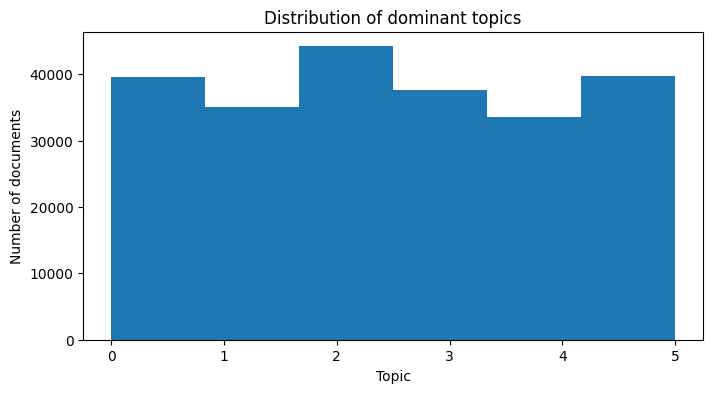

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

doc_topic_dist = best_lda.transform(X)
dominant_topics = doc_topic_dist.argmax(axis=1)

plt.figure(figsize=(8, 4))
plt.hist(dominant_topics, bins=best_lda.n_components)
plt.title("Distribution of dominant topics")
plt.xlabel("Topic")
plt.ylabel("Number of documents")
plt.show()

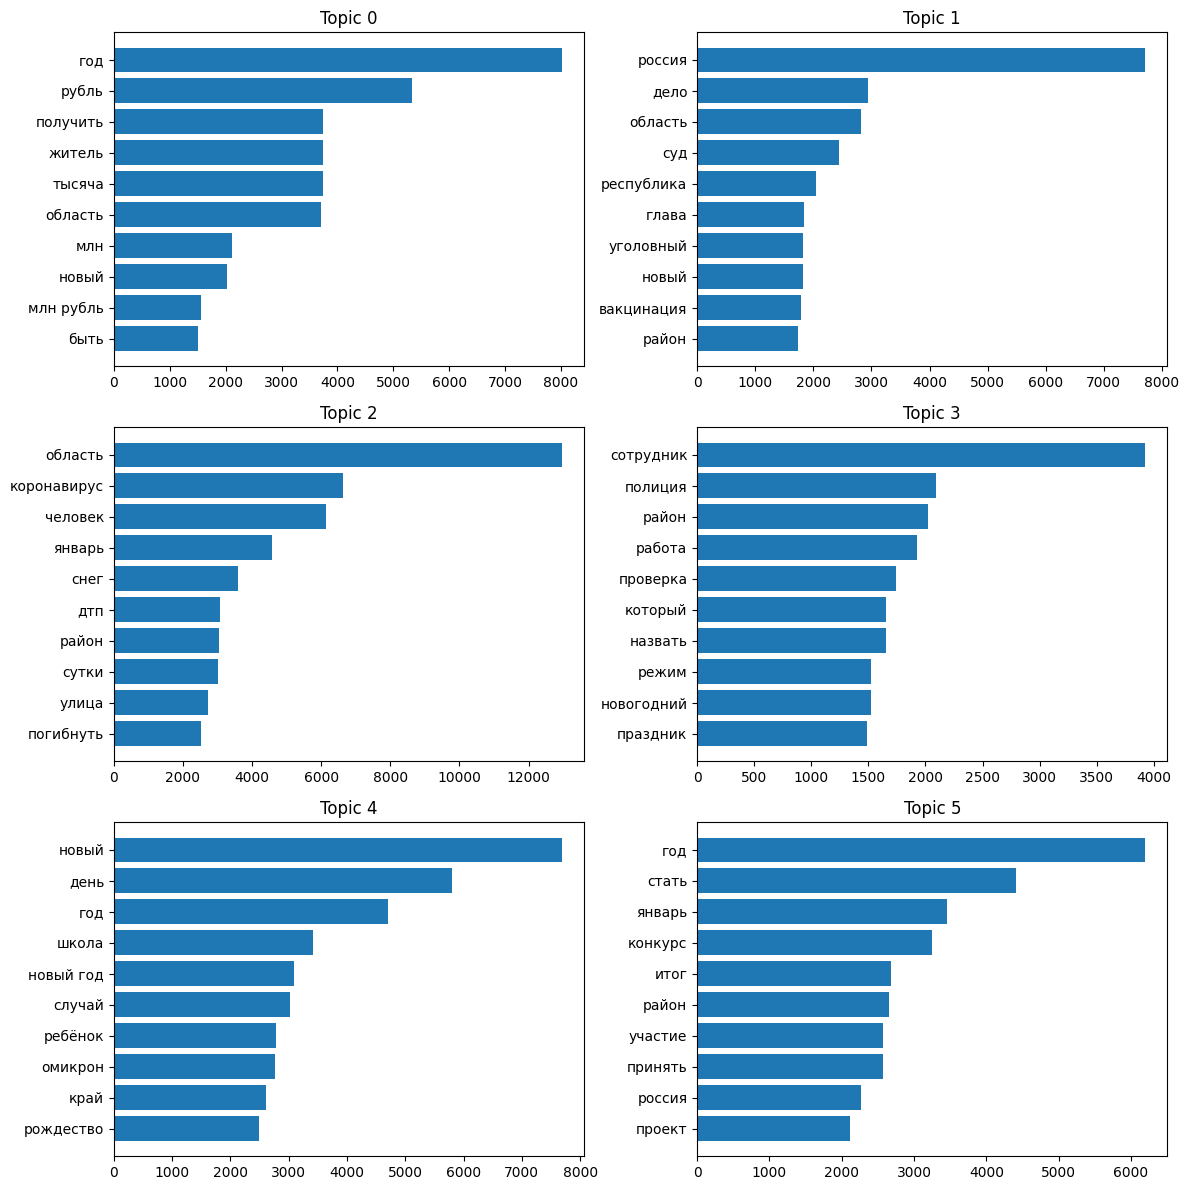

In [ ]:
def plot_top_words(model, feature_names, n_top_words=10):
    n_topics = model.n_components
    fig, axes = plt.subplots(
        nrows=n_topics // 2 + n_topics % 2,
        ncols=2,
        figsize=(12, 2 * n_topics)
    )
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_ids = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_ids]
        weights = topic[top_ids]

        axes[topic_idx].barh(top_words, weights)
        axes[topic_idx].set_title(f"Topic {topic_idx}")
        axes[topic_idx].invert_yaxis()

    plt.tight_layout()
    plt.show()

plot_top_words(best_lda, feature_names)

In [ ]:
!pip install pyldavis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 62.6 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
idx2 = np.random.choice(n_docs, 100000, replace=False)
X_vis = X[idx2]

In [ ]:
import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()

vis = pyLDAvis.lda_model.prepare(
    best_lda,
    X_vis,
    vectorizer,
    mds='tsne',          # быстрее и стабильнее
    sort_topics=False
)

vis


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      11.428651  15.768490       1        1  16.347655
1     -16.692511  15.428266       2        1  17.161063
2      19.805136  42.590809       3        1  18.792090
3      -3.093466  58.848022       4        1  15.687032
4      -2.875824  34.948261       5        1  14.539071
5     -25.683706  42.011074       6        1  17.473089, topic_info=             Term         Freq        Total Category  logprob  loglift
2329      область  8659.000000  8659.000000  Default  30.0000  30.0000
3744       россия  4228.000000  4228.000000  Default  29.0000  29.0000
1608  коронавирус  2852.000000  2852.000000  Default  28.0000  28.0000
2277        новый  5277.000000  5277.000000  Default  27.0000  27.0000
852          день  3053.000000  3053.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
3744       россия   964.076017  4228.448948   Topic6  -4.8076   0.2661
723         город   700.480021  1512.819681   Topic6  -5.1270   0.9745
3672   республика   709.196289  1585.636601   Topic6  -5.1147   0.9399
3502       работа   728.087671  2173.748149   Topic6  -5.0884   0.6507
672         глава   565.903492  1347.461659   Topic6  -5.3404   0.8770

[350 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
6         3  0.881320         авария
6         4  0.114777         авария
33        1  0.001731  администрация
33        2  0.003463  администрация
33        3  0.001731  администрация
...     ...       ...            ...
4983      6  0.337290         январь
4984      1  0.001338     январь год
4984      3  0.001338     январь год
4984      5  0.001338     январь год
4984      6  0.996754     январь год

[1150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])